In [79]:
# Nama : Zaldi Abdul Hadi
# NPM : 24083010002

# TUGAS
# 1) mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)
# 1a) plot grafik-grafik secara berdampingan untuk membandingkan skalanya
# 2) tambahkan faktor-faktor ke objective function (jika perlu)
# 3) temukan titik optimum sesuai diri masing-masing, 
#    temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax
# 4) buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat
#    poin 4 paling penting

# global optimum,
# idx = np.unravel_index(np.argmax(Z_clip), Z_clip.shape)
# opt_x, opt_y, opt_z = X[idx], Y[idx], Z_clip[idx]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

istirahat= 7 # istirahat yang cukup

In [81]:
# Grid setup
xmin, xmax, ymin, ymax, zmin, zmax = 0, 24 - istirahat, 0, 24 - istirahat, 0, 24 - istirahat
res = 240
x = np.linspace(xmin, xmax, res)  # kuliah
y = np.linspace(ymin, ymax, res)  # main
z = np.linspace(zmin, zmax, res)  # nugas+belajar
X, Y, Zz = np.meshgrid(x, y, z)

In [82]:
# kuliah & main
kuliah_pref = np.exp(-((X - 9.0)**2) / (1.5**2))

In [83]:
# bermain, game, instagram, tiktok, dlsb
main_pref = np.exp(-((Y - 3.0)**2) / (1.0**2))

In [84]:
# nugas + belajar preferensi (ideal 2-3 jam setelah main)
nugas_pref = np.exp(-((Zz - 3.0)**2) / (1.0**2))

In [85]:
# kalau total siklus main-kerja lebih dari 24 jam, merusak ritme sirkadian
total_waktu = X + Y + Zz
total_penalty = 0.25 * np.exp(total_waktu / 24.0)
# plt.plot(x, -total_penalty)

In [86]:
# terlena
kebanyakan_main = 1.2 * np.exp(-((Y - 5.0)**2) / 0.8)   # kebanyakan main
# plt.plot(x, -kebanyakan_main)

In [87]:
# burnout
kebanyakan_lembur = 0.8 * np.exp(-((Zz - 5.0)**2) / 0.8)  # kebanyakan lembur
# plt.plot(y, -kebanyakan_lembur )

In [88]:
# naik-turun motivasi harian
NPM = 2
np.random.seed(NPM)
ripple = 0.4 * np.sin((0.3 * X) - 1) * np.cos(1.0 * Y) * np.cos(0.5 * Zz) - 0.2
noise = np.random.normal(loc=0.0, scale=0.05, size=X.shape)
ripple += noise

In [89]:
QoL = 10.0 * (0.5 * kuliah_pref + 0.3 * main_pref + 0.2 * nugas_pref)
QoL = QoL - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple

In [90]:
QoL -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

In [91]:
# 2D slice visualisasi (misal ambil nugas=3 jam)
z_idx = np.argmin(np.abs(z - 3.0))
QoL_slice = QoL[:, :, z_idx]

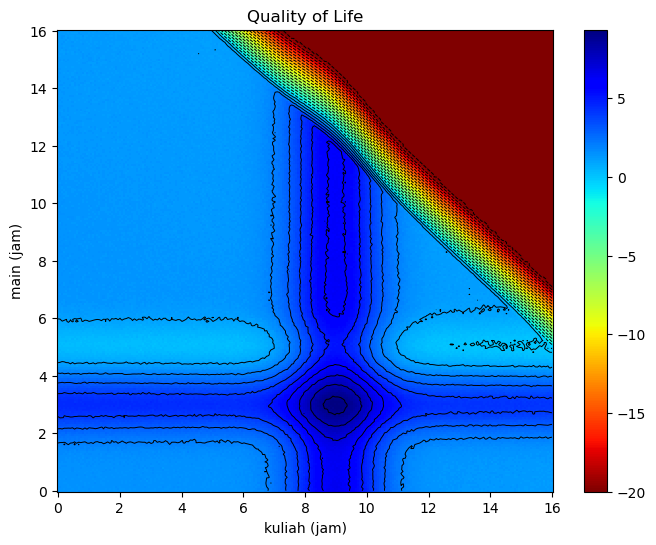

In [92]:
QoL_clip = np.clip(QoL_slice, -20, 20)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X[:, :, z_idx], Y[:, :, z_idx], QoL_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X[:, :, z_idx], Y[:, :, z_idx], QoL_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("Quality of Life")

plt.show()

In [93]:
# cari titik optimum numerik
best_val = -np.inf
best_combo = (0, 0, 0)
for i in range(res):
    for j in range(res):
        for k in range(res):
            val = QoL[i, j, k]
            if val > best_val:
                best_val = val
                best_combo = (X[i, j, k], Y[i, j, k], Zz[i, j, k])

print(f"Optimal kuliah: {best_combo[0]:.2f} jam")
print(f"Optimal main: {best_combo[1]:.2f} jam")
print(f"Optimal nugas+belajar: {best_combo[2]:.2f} jam")
print(f"Skor QoL maksimum: {best_val:.2f}")

Optimal kuliah: 8.97 jam
Optimal main: 3.01 jam
Optimal nugas+belajar: 2.95 jam
Skor QoL maksimum: 9.41


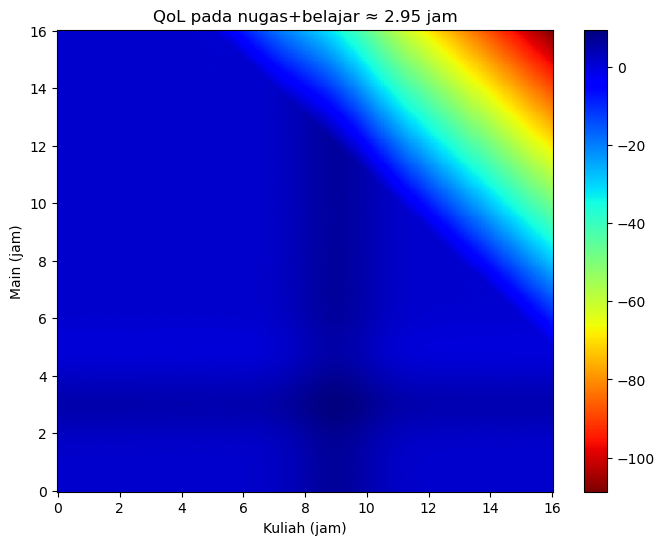

In [94]:
# plot 3D slice (misal potong di Zz optimum)
z_opt = best_combo[2]
idx_z = np.abs(z - z_opt).argmin()
QoL_slice = QoL[:, :, idx_z]

plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X[:, :, idx_z], Y[:, :, idx_z], QoL_slice, cmap='jet_r', shading='auto')
plt.colorbar(c)
plt.xlabel("Kuliah (jam)")
plt.ylabel("Main (jam)")
plt.title(f"QoL pada nugas+belajar ≈ {z_opt:.2f} jam")
plt.show()

Berdasarkan hasil optimasi tadi, kita dapatkan:
- Kuliah: ± 8.8 jam (pas dengan 07.00 – 16.00)
- Main: ± 3 jam (cukup santai, tidak berlebihan)
- Nugas + Belajar: ± 3 jam (cukup untuk mengerjakan tugas + belajar mandiri)
- Tidur: ± 7 jam

Hari saya dimulai pukul lima pagi dengan bangun tidur, mandi dan sholat subuh. Pukul tujuh hingga sekitar pukul empat sore saya mengikuti kuliah di kampus. Di waktu ini saya berusaha fokus penuh, mencatat dan memahami materi agar pembelajaran lebih maksimal. Setelah pulang, saya mengambil waktu satu jam untuk istirahat dan memulihkan energi, misalnya dengan makan sore atau bersantai sebentar.

Mulai pukul lima sore hingga sekitar pukul delapan malam saya gunakan untuk mengerjakan tugas dan belajar. Waktu ini saya manfaatkan untuk menyelesaikan tugas kuliah, mereview materi yang sudah diajarkan di kelas, serta menyiapkan diri untuk pertemuan berikutnya. Dengan cara ini, saya tidak perlu begadang karena beban tugas sudah terkelola dengan baik.

Setelah itu, dari pukul delapan hingga sekitar pukul sepuluh malam saya memberi ruang untuk hiburan dan nongkrong. Sekitar satu jam saya gunakan untuk scroll media sosial dan satu jam berikutnya untuk nongkrong, ngobrol dengan teman atau melakukan hobi ringan. Pukul sepuluh malam saya mulai menyiapkan diri untuk tidur misalnya dengan membersihkan diri. Akhirnya, saya tidur pada pukul sepuluh malam agar bisa mendapat waktu istirahat sekitar tujuh jam sebelum memulai hari berikutnya.

Pola ini membuat keseharian saya lebih seimbang. Saya tetap produktif dengan kuliah dan belajar, tetapi juga tidak kehilangan waktu santai dan hiburan. Tidur cukup membuat tubuh segar dan tetap terjaga, sehingga kualitas hidup saya berada pada level optimal.